In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Machine Learning_Rsearch data set/R/ACL plas - APLA 2022-2023 - Sheet1.csv')
df

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,1/3/2022,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,1/4/2022,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,1/5/2022,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,1/6/2022,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,1/7/2022,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,3/24/2023,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,3/27/2023,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,3/28/2023,409.25,386.0,395.75,38.0,677.0,269747.0
289,3/30/2023,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
df.isnull().sum()

Day              0
High             0
Low              0
Close            0
No. of Trades    0
No. of Shares    0
Turnover(Rs.)    0
dtype: int64

In [ ]:
# check the missing values
print ('Total missing values in the train dataset', sum(df.isna().sum()))

Total missing values in the train dataset 0


In [ ]:
# Find and remove unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=unnamed_columns)


In [ ]:
df.shape

(291, 7)

In [ ]:
#Remove rows with missing values
df = df.dropna()

# Reset the index after removing rows
df = df.reset_index(drop=True)

In [ ]:
df.shape

(291, 7)

In [ ]:
df.isnull().sum()

Day              0
High             0
Low              0
Close            0
No. of Trades    0
No. of Shares    0
Turnover(Rs.)    0
dtype: int64

In [ ]:
df

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,1/3/2022,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,1/4/2022,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,1/5/2022,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,1/6/2022,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,1/7/2022,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,3/24/2023,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,3/27/2023,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,3/28/2023,409.25,386.0,395.75,38.0,677.0,269747.0
289,3/30/2023,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
#Catch the date column that does not conform to the expected date format
from dateutil.parser import ParserError

for i, value in enumerate(df['Day']):
    try:
        parsed_date = pd.to_datetime(value)
    except ParserError:
        print(f"Invalid date at row {i}: {value}")

# Load the dataset and handle bad lines using error_bad_lines and on_bad_lines
try:
    df = pd.read_csv("/content/drive/MyDrive/Machine Learning_Rsearch data set/R/ACL plas - APLA 2022-2023 - Sheet1.csv", on_bad_lines='warn')
except pd.errors.ParserError as e:
    print(f"Error while reading CSV: {e}")

# Now you have 'data' DataFrame with problematic rows skipped or warned

df

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,1/3/2022,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,1/4/2022,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,1/5/2022,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,1/6/2022,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,1/7/2022,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,3/24/2023,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,3/27/2023,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,3/28/2023,409.25,386.0,395.75,38.0,677.0,269747.0
289,3/30/2023,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
from dateutil.parser import ParserError

#specify the column containing date values
date_column = 'Day'  # Replace with the actual column name

# Function to identify problematic rows (rows with unparsable dates)
def is_problematic_date(date_str):
    try:
        pd.to_datetime(date_str)
        return False  # Date is valid
    except (ParserError, ValueError):
        return True  # Date is problematic and should be removed

# Apply the function to create a boolean mask
mask = df[date_column].apply(is_problematic_date)

# Remove problematic rows
df = df[~mask]  # ~ symbol is used to negate the boolean mask

# Now 'data' contains only rows with valid date values

# Convert the 'Date' column to datetime if it's not already
df['Day'] = pd.to_datetime(df['Day'])

# Filter the data to include only the year 2022 and 2023
start_date = '2022-01-01'
end_date = '2023-12-31'
df = df[(df['Day'] >= start_date) & (df['Day'] <= end_date)]
df


,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,2022-01-03,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,2022-01-04,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,2022-01-05,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,2022-01-06,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,2022-01-07,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,2023-03-24,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,2023-03-27,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,2023-03-28,409.25,386.0,395.75,38.0,677.0,269747.0
289,2023-03-30,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
# Calculate the number of days from a reference date
reference_date = df['Day'].min()  # Choose the reference date
df['Day'] = (df['Day'] - reference_date).dt.days
df

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,0,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,1,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,2,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,3,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,4,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,445,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,448,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,449,409.25,386.0,395.75,38.0,677.0,269747.0
289,451,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
# Remove the commas and convert to float and filter out rows with non-numeric values
# List of column names to convert
columns_to_convert = ['High', 'Low', 'Close','Turnover(Rs.)','No. of Trades','No. of Shares']

# Function to remove commas and convert to float
# Iterate over the columns
for column in columns_to_convert:
    if column in df:
        for row_number, value in enumerate(df[column]):
            try:
                if isinstance(value, str):
                   converted_value = float(value.replace(',', ''))
                   df.at[row_number, column] = converted_value
                else:
                    # If the value is already a float, you can skip it or handle it as needed
                    pass
            except ValueError as e:
                print(f"Error in row {row_number} of column {column}: {e}")
                # Remove the entire row with the error
                df = df.drop(row_number)
    else:
        print(f"Column '{column}' not found in the dataset.")

# Reset the row indices
df = df.reset_index(drop=True)

# Now the specified columns contain floating-point numbers without commas, and rows with errors are removed

df

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,0,600.00,575.0,590.50,69.0,7293.0,4362905.0
1,1,600.00,575.5,588.25,61.0,14008.0,8258712.0
2,2,600.00,580.0,587.50,77.0,5001.0,2957519.0
3,3,590.00,575.0,588.75,107.0,3729.0,2160428.0
4,4,674.00,580.0,664.25,222.0,53838.0,34345351.0
...,...,...,...,...,...,...,...
286,445,410.00,400.0,400.00,22.0,4191.0,1699448.0
287,448,410.00,400.0,409.25,12.0,3969.0,1624658.0
288,449,409.25,386.0,395.75,38.0,677.0,269747.0
289,451,400.00,400.0,395.75,1.0,1.0,400.0


In [ ]:
# Find and remove unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=unnamed_columns)


In [ ]:
#Remove rows with missing values
df = df.dropna()

# Reset the index after removing rows
df = df.reset_index(drop=True)

In [ ]:
X = df.drop(columns = 'Close')
X

,Day,High,Low,No. of Trades,No. of Shares,Turnover(Rs.)
0,0,600.00,575.0,69.0,7293.0,4362905.0
1,1,600.00,575.5,61.0,14008.0,8258712.0
2,2,600.00,580.0,77.0,5001.0,2957519.0
3,3,590.00,575.0,107.0,3729.0,2160428.0
4,4,674.00,580.0,222.0,53838.0,34345351.0
...,...,...,...,...,...,...
286,445,410.00,400.0,22.0,4191.0,1699448.0
287,448,410.00,400.0,12.0,3969.0,1624658.0
288,449,409.25,386.0,38.0,677.0,269747.0
289,451,400.00,400.0,1.0,1.0,400.0


In [ ]:
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with features (X) and target (y)
#X, y = your_data_preparation_function()

# Check the size of your dataset
n_samples = X.shape[0]

# Ensure that the test size is smaller than the available data
if n_samples > 0:
    test_size = min(0.3, 1 / n_samples)  # Limit test_size to 30% or 1 sample
else:
    test_size = 0.3  # A default test size

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
c = lr_multiple.intercept_
c

10.252958867473069

In [ ]:
m = lr_multiple.coef_
m

array([ 4.35378000e-04,  3.40313848e-01,  6.31981539e-01,  1.71732817e-02,
       -7.08891578e-04,  2.21821168e-06])

In [ ]:
y_pred_train = lr_multiple.predict(X_train)
y_pred_test = lr_multiple.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Check if you have enough data for testing
if len(X) < 2:
    print("Error: Not enough data points for testing.")
else:
    # Split the data into training and testing sets (e.g., 70% for training, 30% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the linear regression model
    lr_multiple = LinearRegression()
    lr_multiple.fit(X_train, y_train)

    # Check if you have enough data for testing
    if len(X_test) < 2:
        print("Error: Not enough data points for testing.")
    else:
        # Make predictions
        y_pred_test = lr_multiple.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)

        print("Mean Squared Error:", mse)
        print("R-squared:", r2)


# Sample actual and predicted values
actual_values = y_test
predicted_values = y_pred_test

# Calculate APE for each data point
ape = np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values)) * 100

# Calculate the mean APE to get MAPE
mape = np.mean(ape)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("70% for training, 30% for testing")

Mean Squared Error: 205.29262309336602
R-squared: 0.9916343955113407
Mean Absolute Percentage Error (MAPE): 2.10%
70% for training, 30% for testing


In [ ]:
print(len(y_test), len(y_pred_test))


88 88


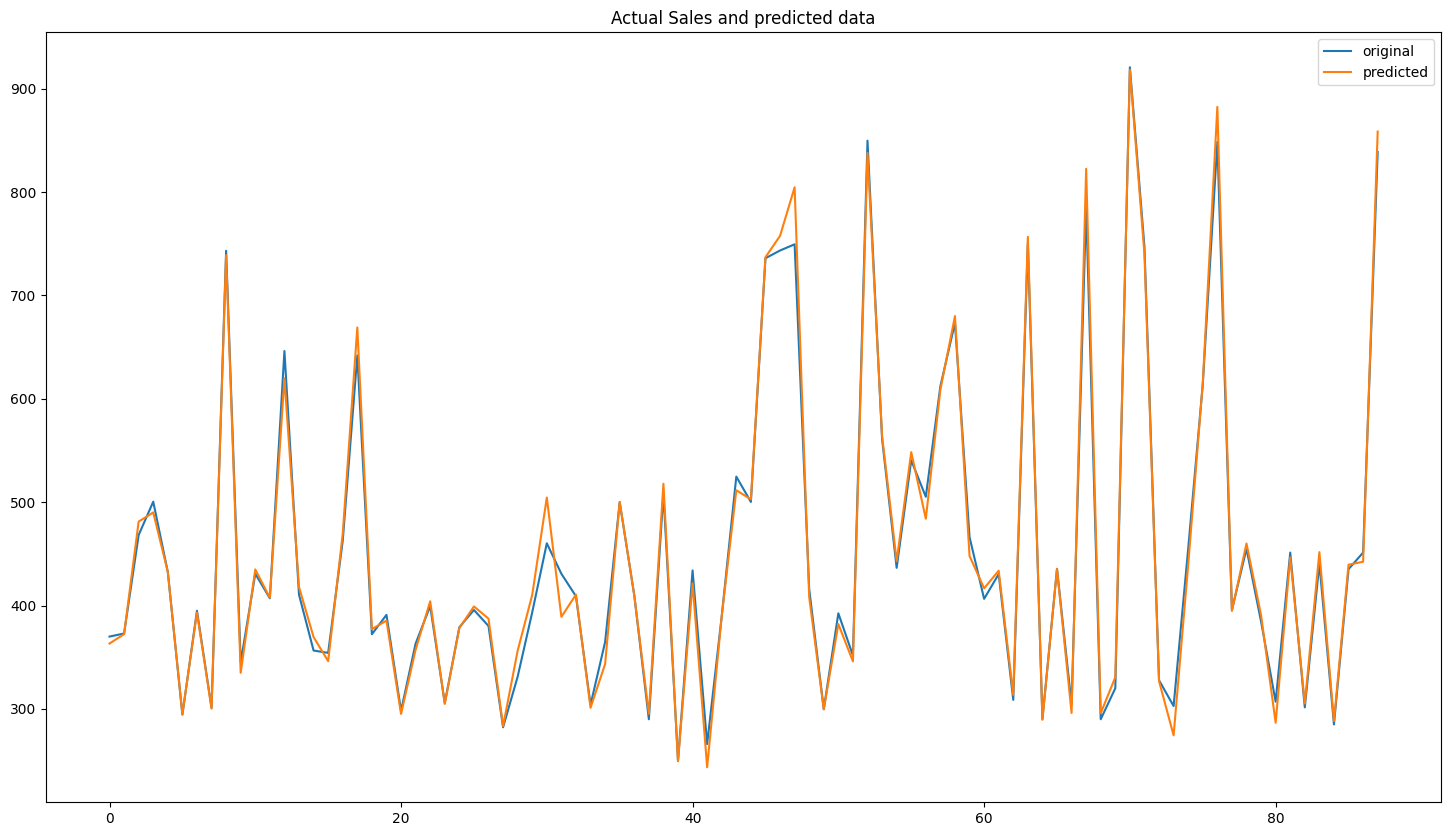

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y_pred_test, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()

Mean Squared Error: 204.51607016922281
R-squared: 0.9888466226698112
Mean Absolute Percentage Error (MAPE): 2.06%
80% for training, 20% for testing


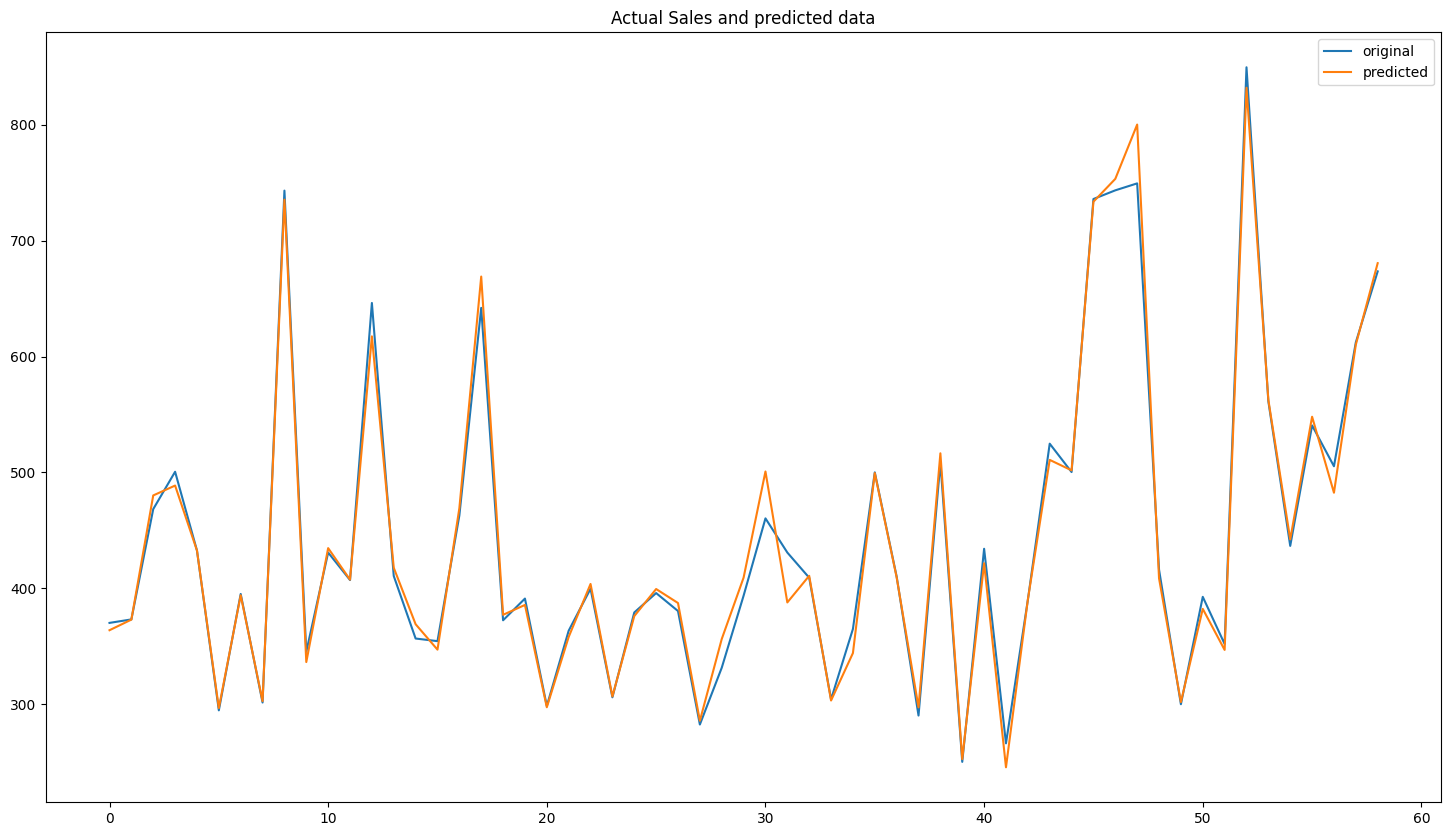

In [ ]:
#CODE FOR 80% for training, 20% for testing
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with features (X) and target (y)
#X, y = your_data_preparation_function()

# Check the size of your dataset
n_samples = X.shape[0]

# Ensure that the test size is smaller than the available data
if n_samples > 0:
    test_size = min(0.2, 1 / n_samples)  # Limit test_size to 20% or 1 sample
else:
    test_size = 0.2  # A default test size

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

c = lr_multiple.intercept_
c

m = lr_multiple.coef_
m

y_pred_train = lr_multiple.predict(X_train)
y_pred_test = lr_multiple.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Check if you have enough data for testing
if len(X) < 2:
    print("Error: Not enough data points for testing.")
else:
    # Split the data into training and testing sets (e.g., 80% for training, 30% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    lr_multiple = LinearRegression()
    lr_multiple.fit(X_train, y_train)

    # Check if you have enough data for testing
    if len(X_test) < 2:
        print("Error: Not enough data points for testing.")
    else:
        # Make predictions
        y_pred_test = lr_multiple.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)

        print("Mean Squared Error:", mse)
        print("R-squared:", r2)


# Sample actual and predicted values
actual_values = y_test
predicted_values = y_pred_test

# Calculate APE for each data point
ape = np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values)) * 100

# Calculate the mean APE to get MAPE
mape = np.mean(ape)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("80% for training, 20% for testing")

import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y_pred_test, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()